In [ ]:
from google.colab import files
uploaded = files.upload()

Saving twitter_training.csv to twitter_training.csv


In [ ]:
import pandas as pd
df = pd.read_csv("twitter_training.csv")
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
!pip install textblob wordcloud vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
import re

def clean_text(text):
    text = re.sub(r"http\S+", "", str(text))  # remove links
    text = re.sub(r"@\w+", "", text)          # remove mentions
    text = re.sub(r"#", "", text)             # remove hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)   # keep only letters
    return text.lower()

df['clean_text'] = df['text'].astype(str).apply(clean_text)
df[['text', 'clean_text']].head()


KeyError: 'text'

In [ ]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [ ]:
import pandas as pd

# Read without using any row as header
df = pd.read_csv("twitter_training.csv", header=None)

# Assign expected column names (common for this Kaggle file)
df.columns = ['id', 'entity', 'sentiment', 'text']

# Quick check
print(df.shape)
df.head()


(74682, 4)


,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
import re

def clean_text(text):
    text = re.sub(r"http\S+", "", str(text))   # remove links
    text = re.sub(r"@\w+", "", text)           # remove mentions
    text = re.sub(r"#", "", text)              # remove hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)    # keep only letters
    return text.lower().strip()

df['clean_text'] = df['text'].astype(str).apply(clean_text)
df[['text','clean_text']].head()


,text,clean_text
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


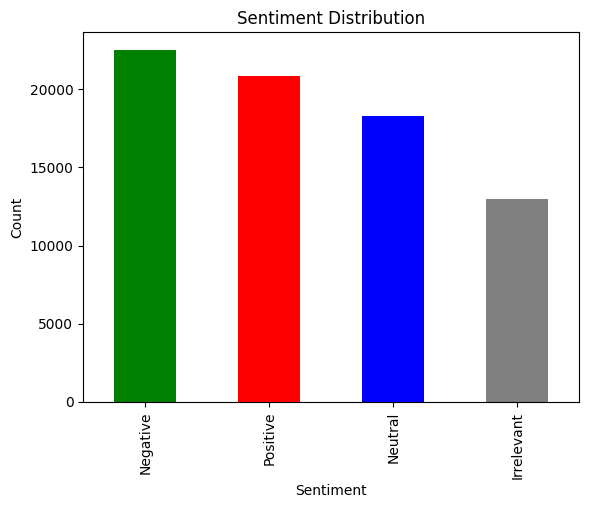

In [ ]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar', color=['green','red','blue','gray'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


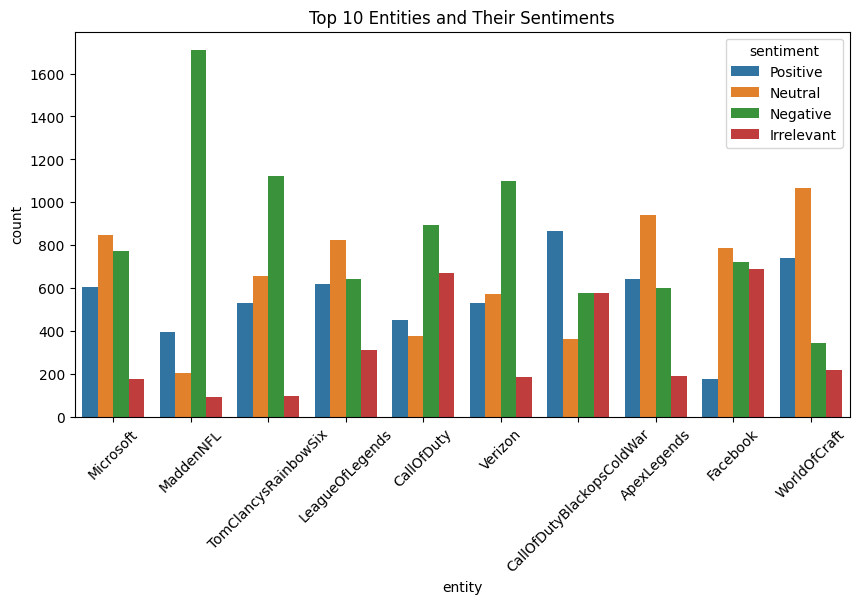

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='entity', hue='sentiment', order=df['entity'].value_counts().iloc[:10].index)
plt.title("Top 10 Entities and Their Sentiments")
plt.xticks(rotation=45)
plt.show()


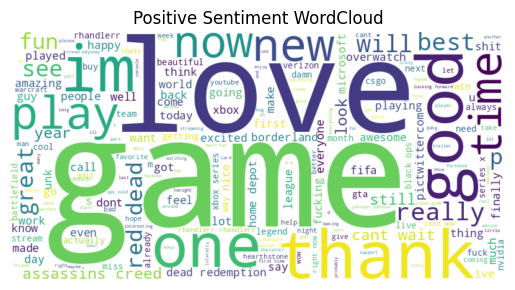

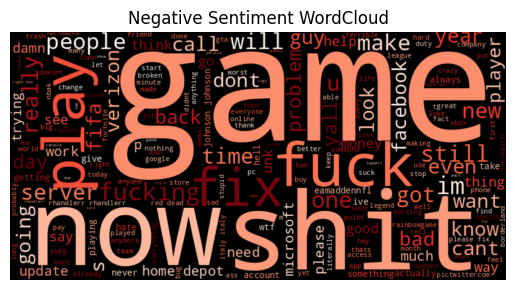

In [ ]:
from wordcloud import WordCloud

# Positive tweets
pos_text = " ".join(df[df['sentiment']=="Positive"]['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment WordCloud")
plt.show()

# Negative tweets
neg_text = " ".join(df[df['sentiment']=="Negative"]['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(neg_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Sentiment WordCloud")
plt.show()


In [ ]:
top_pos = df[df['sentiment']=="Positive"]['entity'].value_counts().head(5)
top_neg = df[df['sentiment']=="Negative"]['entity'].value_counts().head(5)
print("Top Positive Entities:\n", top_pos)
print("\nTop Negative Entities:\n", top_neg)


Top Positive Entities:
 entity
AssassinsCreed            1446
Borderlands               1020
Cyberpunk2077              966
PlayStation5(PS5)          942
RedDeadRedemption(RDR)     930
Name: count, dtype: int64

Top Negative Entities:
 entity
MaddenNFL               1710
NBA2K                   1476
FIFA                    1176
TomClancysRainbowSix    1122
Verizon                 1098
Name: count, dtype: int64


In [ ]:
# Summary:
# Positive entities (Assassin’s Creed, Cyberpunk, etc.) show high user satisfaction.
# Negative entities (Madden NFL, FIFA, Verizon, etc.) highlight major criticisms.
# Insight: Story-driven games get love, sports/service brands get complaints.
